## **Trabajo Práctico Final: TELCO CHURN**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Integrantes: Martina Stamparin & Martina Crivaro
- Grupo 3

## **Objetivos del proyecto**
La Telco NN solicita predecir que clientes dejarán la compañía. Utilizando un dataset con una cartera de clientes de 7.043 personas con 21 variables que muestran algunas características de los clientes en la empresa.

#### Variables:
- Customer ID:	Valor identificador de clientes
- gender:	Género del cliente
- SeniorCitizien:	Si el cliente es un SeniorCitizien o no
- Partner:	Si el cliente tiene un socio o no
- Dependents:	Si el cliente tiene dependientes o no
- tenure:	Antigüedad del cliente
- PhoneService:	Si el cliente tiene un servicio de telefono o no
- MultipleLines:	Si el cliente tiene multiples lineas o no
- InternetService:	Tipo de servicio de internet que recibe. Si es que recibe
- OnlineSecurity:	Si el cliente tiene un servicio de seguridad online o no
- OnlineBackup:	Si el cliente tiene un servicio de backup o no.
- DeviceProtection:	Si el cliente tiene un seguro del dispositivo o no
- TechSupport:	Si el cliente tiene soporte de tecnología o no.
- StreamingTV:	Si el cliente tiene servicio de streaming o no
- StreamingMovies:	Si el cliente tiene servicios de streaming de peliculas o no
- Contract:	Tipo de contrato del cliente
- PaperlessBilling:	Si el cliente recibe la factura en papel o no.
- PaymentMethod:	Tipo de pago del cliente
- MonthlyCharges:	Costo mensual
- TotalCharges:	Cargos totales
- Churn:	Si el cliente se fue de la compañía o no

In [2]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV # Hace una busqueda de una cantidad determinada de parametros en lugar de todas las combinaciones posibles
# Prepocessing & Utils.
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
#Metricas
from sklearn.metrics import accuracy_score,roc_curve, auc,confusion_matrix
# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# **EDA**

---



In [4]:
# Verificamos si estamos en Colab
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab:
  #Montamos nuestro G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  # Direccion root donde está la jupyter-notebook
  root_path = "/content/drive/MyDrive/Ciencia de Datos/TP_Final/telco_churn_clusterai.csv"
  # Direccion donde guardaremos las imagenes
  plot_path = root_path
else:
  # Si, no estamos en google colab, es que estamos corriendo la
  # en local.
  root_path = "./"
  plot_path = root_path

True
Mounted at /content/gdrive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Cargamos el dataset
telcochurn = pd.read_csv(root_path)

In [7]:
#Verificamos con .head() que los datos se hayan cargado correctamente
telcochurn.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [8]:
# Definimos columnas y filas del dataset con np.shape() para entender la dimension con la que trabajaremos
print(f'Dimensiones => {np.shape(telcochurn)}')
Filas = np.shape(telcochurn)[0]
Columnas = np.shape(telcochurn)[1]
print(f'Cant. de Filas: {Filas}')
print(f'Cant. de Columnas: {Columnas}')

Dimensiones => (7043, 22)
Cant. de Filas: 7043
Cant. de Columnas: 22


### **Limpieza de datos:**

In [9]:
# Eliminamos la columna "Unnamed: 0" ya que es un valor repetido, luego volvemos a guardar el dataset como TelcoChurn y mostramos dimensiones
telcochurn = telcochurn.drop(columns=["Unnamed: 0"])
telcochurn.to_csv("TelcoChurn.csv", index=False)
print(f'Dimensiones => {np.shape(telcochurn)}')
Filas = np.shape(telcochurn)[0]
Columnas = np.shape(telcochurn)[1]
print(f'Cant. de Filas: {Filas}')
print(f'Cant. de Columnas: {Columnas}')


Dimensiones => (7043, 21)
Cant. de Filas: 7043
Cant. de Columnas: 21


In [10]:
# Buscamos duplicados en la columna CustomerID que deberia ser un valor único, para luego proceder a eliminarlos si existen:
duplicados = telcochurn['customerID'].duplicated().any()
print(f"Existencia de duplicados: {duplicados}")

Existencia de duplicados: False


In [11]:
# Ahora que sabemos que no hay clientes duplicados, eliminamos la columna "CustomerID". Volvemos a guardar y observamos dimensiones
telcochurn = telcochurn.drop(columns=["customerID"])
telcochurn.to_csv("TelcoChurn.csv", index=False)
print(f'Dimensiones => {np.shape(telcochurn)}')
Filas = np.shape(telcochurn)[0]
Columnas = np.shape(telcochurn)[1]
print(f'Cant. de Filas: {Filas}')
print(f'Cant. de Columnas: {Columnas}')

Dimensiones => (7043, 20)
Cant. de Filas: 7043
Cant. de Columnas: 20


In [12]:
# Observamos el tipo de información de cada columna y si existen valores nulos presentes:
datos=telcochurn.dtypes
nulos=telcochurn.isnull().sum()
resultados = pd.DataFrame({
    'Tipo de Dato': datos,
    'Cantidad de Nulos': nulos
})

print(resultados)


                 Tipo de Dato  Cantidad de Nulos
gender                 object                916
SeniorCitizen         float64                916
Partner                object                916
Dependents             object                916
tenure                float64                916
PhoneService           object                916
MultipleLines          object                916
InternetService        object                916
OnlineSecurity         object                916
OnlineBackup           object                916
DeviceProtection       object                  0
TechSupport            object                  0
StreamingTV            object                  0
StreamingMovies        object                  0
Contract               object               1197
PaperlessBilling       object               1197
PaymentMethod          object               1197
MonthlyCharges        float64               1197
TotalCharges           object                  0
Churn               

In [13]:
# Podemos observar que MonthlyCharges se muestra como Object cuando deberia ser Float, entonces analizamos y corregimos:
# Revisamos valores únicos de 'TotalCharges' para identificar problemas
print("Valores únicos en TotalCharges:", telcochurn['TotalCharges'].unique()[:10])

# Reemplazamos espacios vacíos o valores no numéricos por NaN
telcochurn['TotalCharges'] = pd.to_numeric(telcochurn['TotalCharges'], errors='coerce')

# Verificamos cuántos valores se convirtieron en NaN
print("Cantidad de NaN después del reemplazo:", telcochurn['TotalCharges'].isna().sum())

# Reemplazamos los NaN en 'TotalCharges' por 0
telcochurn['TotalCharges'] = telcochurn['TotalCharges'].fillna(0)

# Verificamos el cambio
telcochurn.info()

Valores únicos en TotalCharges: ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
Cantidad de NaN después del reemplazo: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6127 non-null   object 
 1   SeniorCitizen     6127 non-null   float64
 2   Partner           6127 non-null   object 
 3   Dependents        6127 non-null   object 
 4   tenure            6127 non-null   float64
 5   PhoneService      6127 non-null   object 
 6   MultipleLines     6127 non-null   object 
 7   InternetService   6127 non-null   object 
 8   OnlineSecurity    6127 non-null   object 
 9   OnlineBackup      6127 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies 

In [14]:
# Haremos un reemplazo de valores NaN según corresponda.
# En el caso de las columnas InternetService y PhoneService, segun un análisis previo que pudimos realizar de forma visual, haremos un reemplazo condicional
# que dependerá de las columnas cosiguientes.

# Luego tambien dejaremos todos los valores "No Internet/Phone Service" como "No" para luego poder contabilizar la cantidad de servicios
# contratados por el cliente

# Al hacer este doble reemplazo es importante correr todas las celdas de 0 antes de correr esta, ya que si no los condicionales fallarán.

# Para la columna MonthlyCharges y tenure reemplazaremos por 0 para mantener todos sus valores como Float y en caso de analizar esta dimension podremos desestimarlos como outliers
# Para las demás columnas solo reemplazaremos por "Unknown"

# Lista de columnas relacionadas con InternetService
internet_related_columns = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

# Reemplazo condicional para la columna 'InternetService'
telcochurn['InternetService'] = telcochurn['InternetService'].fillna(
    telcochurn[internet_related_columns].eq("No internet service").any(axis=1).map({True: "No", False: "Unknown"})
)

# Condicional para los NaN en PhoneService basado en MultipleLines
telcochurn['PhoneService'] = telcochurn.apply(
    lambda row: "No" if row['MultipleLines'] == "No phone service" else
                "Yes" if row['MultipleLines'] in ["No", "Yes"] else
                "Unknown" if pd.isnull(row['MultipleLines']) and pd.isnull(row['PhoneService']) else
                row['PhoneService'],
    axis=1
)

# Reemplazo condicional para las columnas relacionadas con InternetService
for column in internet_related_columns:
    telcochurn[column] = telcochurn.apply(
        lambda row: "No" if row['InternetService'] == "No" and pd.isnull(row[column]) else row[column], axis=1
    )

# Reemplazo condicional para la columna 'MultipleLines' según PhoneService
telcochurn['MultipleLines'] = telcochurn.apply(
    lambda row: "No" if row['PhoneService'] == "No" and pd.isnull(row['MultipleLines']) else row['MultipleLines'], axis=1
)

# Ahora reemplazar todos los "No internet service" y "No phone service" por "No"
telcochurn.replace({"No internet service": "No", "No phone service": "No"}, inplace=True)

# Aplicamos una función para rellenar NaN con valores aleatorios en las columnas que sabemos que no representan algo especifico
def fill_random_yes_no(column):
    prob_yes = (telcochurn[column] == "Yes").mean()  # Probabilidad de "Yes"
    return telcochurn[column].apply(
        lambda x: np.random.choice(["Yes", "No"], p=[prob_yes, 1 - prob_yes]) if pd.isnull(x) else x
    )

# Lista de columnas a rellenar
columns_to_fill = ['gender', 'Partner', 'Dependents', 'PaperlessBilling']

# Aplicar la función a cada columna
for col in columns_to_fill:
    telcochurn[col] = fill_random_yes_no(col)

# Reemplazar NaN en la columna 'MonthlyCharges', 'tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'Churn'  por 0
telcochurn['MonthlyCharges'] = telcochurn['MonthlyCharges'].fillna(0)
telcochurn['tenure'] = telcochurn['tenure'].fillna(0)
telcochurn['SeniorCitizen'] = telcochurn['SeniorCitizen'].fillna(0)
telcochurn['MultipleLines'] = telcochurn['MultipleLines'].fillna(0)
telcochurn['OnlineSecurity'] = telcochurn['OnlineSecurity'].fillna(0)
telcochurn['OnlineBackup'] = telcochurn['OnlineBackup'].fillna(0)



# Reemplazar NaN en la columna 'Contract', 'PaymentMethod' por "Unknown"
telcochurn['Contract'] = telcochurn['Contract'].fillna("Unknown")
telcochurn['PaymentMethod'] = telcochurn['PaymentMethod'].fillna("Unknown")

# Verificar el resultado
telcochurn.head(25)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,Unknown,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.00,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,Unknown,Yes,0,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,0.0,No,No,Unknown,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.00,151.65,Yes
5,Female,0.0,No,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.65,820.50,Yes
6,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Unknown,Yes,Credit card (automatic),89.10,1949.40,No
7,No,0.0,No,No,10.0,No,No,DSL,Yes,No,No,No,No,No,Unknown,No,Mailed check,29.75,301.90,No
8,No,0.0,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
# Comprobamos si el reemplazo de valores nulos fue efectivo:
datos=telcochurn.dtypes
nulos=telcochurn.isnull().sum()
resultados = pd.DataFrame({
    'Tipo de Dato': datos,
    'Cantidad de Nulos': nulos
})

print(resultados)

                 Tipo de Dato  Cantidad de Nulos
gender                 object                  0
SeniorCitizen         float64                  0
Partner                object                  0
Dependents             object                  0
tenure                float64                  0
PhoneService           object                  0
MultipleLines          object                  0
InternetService        object                  0
OnlineSecurity         object                  0
OnlineBackup           object                  0
DeviceProtection       object                  0
TechSupport            object                  0
StreamingTV            object                  0
StreamingMovies        object                  0
Contract               object                  0
PaperlessBilling       object                  0
PaymentMethod          object                  0
MonthlyCharges        float64                  0
TotalCharges          float64                  0
Churn               

In [16]:
# Crearemos una nueva columna 'ServicesQty' para determinar a cuantos servicios se encuentra subscripto el cliente y luego poder entender si
# esto influencia en la decisión de continuar o cancelar los servicios

# Generamos la columna
services_qty = (
    (telcochurn['PhoneService'] == "Yes").astype(int) +  # Cuenta "Yes" en PhoneService
    (telcochurn['InternetService'] != "No").astype(int) +  # Cuenta valores distintos a "No" en InternetService
    (telcochurn['OnlineSecurity'] == "Yes").astype(int) +  # Cuenta "Yes" en OnlineSecurity
    (telcochurn['OnlineBackup'] == "Yes").astype(int) +  # Cuenta "Yes" en OnlineBackup
    (telcochurn['DeviceProtection'] == "Yes").astype(int) +  # Cuenta "Yes" en DeviceProtection
    (telcochurn['TechSupport'] == "Yes").astype(int) +  # Cuenta "Yes" en TechSupport
    (telcochurn['StreamingTV'] == "Yes").astype(int) +  # Cuenta "Yes" en StreamingTV
    (telcochurn['StreamingMovies'] == "Yes").astype(int)  # Cuenta "Yes" en StreamingMovies
)

# Agregamos la columna al dataset
telcochurn['ServicesQty'] = services_qty

# Verificamos el resultado
telcochurn.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServicesQty
0,Female,0.0,Yes,No,1.0,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,No,Electronic check,29.85,29.85,No,2
1,Male,0.0,No,No,34.0,Yes,No,Unknown,Yes,No,...,No,No,No,One year,No,Mailed check,0.00,1889.50,No,4
2,Male,0.0,No,No,2.0,Yes,No,Unknown,Yes,0,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3
3,Male,0.0,No,No,0.0,No,No,Unknown,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,0.00,151.65,Yes,2
5,Female,0.0,No,No,8.0,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,No,Electronic check,99.65,820.50,Yes,5
6,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Unknown,Yes,Credit card (automatic),89.10,1949.40,No,4
7,No,0.0,No,No,10.0,No,No,DSL,Yes,No,...,No,No,No,Unknown,No,Mailed check,29.75,301.90,No,2
8,No,0.0,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,6
9,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,4


In [17]:
# Convertimos todos los "Yes" a 1 y "No" a 0 en todas las columnas del dataset para poder generar el modelo con el dataset completo
telcochurn.replace({"Yes": 1, "No": 0}, inplace=True)
telcochurn.head()

<ipython-input-17-9ae917393b93>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telcochurn.replace({"Yes": 1, "No": 0}, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServicesQty
0,Female,0.0,1,0,1.0,0,0,DSL,0,1,...,0,0,0,Month-to-month,0,Electronic check,29.85,29.85,0,2
1,Male,0.0,0,0,34.0,1,0,Unknown,1,0,...,0,0,0,One year,0,Mailed check,0.00,1889.50,0,4
2,Male,0.0,0,0,2.0,1,0,Unknown,1,0,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,3
3,Male,0.0,0,0,0.0,0,0,Unknown,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,4
4,Female,0.0,0,0,2.0,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,0.00,151.65,1,2


## **Visualización y Análisis**

Amount of Customers that left Telco
Churn
0    5174
1    1869
Name: count, dtype: int64


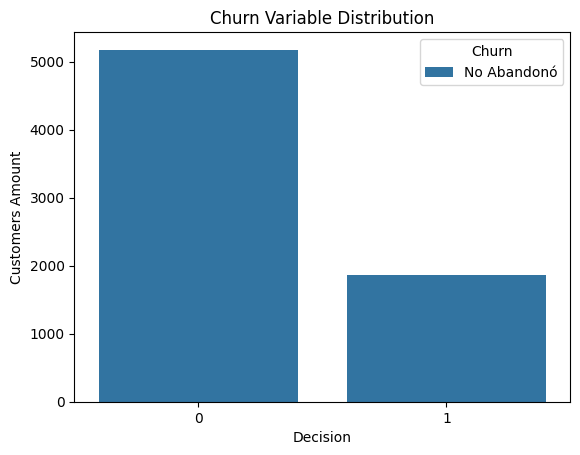

In [18]:
# Visualizamos la distribución de Churn
churn_counts = telcochurn['Churn'].value_counts()
print("Amount of Customers that left Telco")
print(churn_counts)
sns.countplot(data=telcochurn, x='Churn', legend='auto')
plt.title('Churn Variable Distribution')
plt.xlabel('Decision')
plt.ylabel('Customers Amount')
plt.legend(title='Churn', labels=['No Abandonó', 'Abandonó'])
plt.show()

In [19]:
#Generamos Dummies
Gender_dummies =pd.get_dummies(telcochurn['gender'], prefix='Gender')
IntServ_dummies = pd.get_dummies(telcochurn['InternetService'], prefix='IntServ')
Contract_dummies = pd.get_dummies(telcochurn['Contract'], prefix='Contract')
PayMeth_dummies = pd.get_dummies(telcochurn['PaymentMethod'], prefix='PayMeth')
dummies = pd.concat([IntServ_dummies, Contract_dummies, PayMeth_dummies], axis=1)
dummies = dummies.astype(int)

In [20]:
telcochurn_1 = telcochurn.join(dummies)
telcochurn_1.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,IntServ_Unknown,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_Unknown,PayMeth_Bank transfer (automatic),PayMeth_Credit card (automatic),PayMeth_Electronic check,PayMeth_Mailed check,PayMeth_Unknown
0,Female,0.0,1,0,1.0,0,0,DSL,0,1,...,0,1,0,0,0,0,0,1,0,0
1,Male,0.0,0,0,34.0,1,0,Unknown,1,0,...,1,0,1,0,0,0,0,0,1,0
2,Male,0.0,0,0,2.0,1,0,Unknown,1,0,...,1,1,0,0,0,0,0,0,1,0
3,Male,0.0,0,0,0.0,0,0,Unknown,1,0,...,1,0,1,0,0,1,0,0,0,0
4,Female,0.0,0,0,2.0,1,0,Fiber optic,0,0,...,0,1,0,0,0,0,0,1,0,0
5,Female,0.0,0,0,8.0,1,1,Fiber optic,0,0,...,0,1,0,0,0,0,0,1,0,0
6,Male,0.0,0,1,22.0,1,1,Fiber optic,0,1,...,0,0,0,0,1,0,1,0,0,0
7,0,0.0,0,0,10.0,0,0,DSL,1,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0.0,1,0,28.0,1,1,Fiber optic,0,0,...,0,1,0,0,0,0,0,1,0,0
9,Male,0.0,0,1,62.0,1,0,DSL,1,1,...,0,0,1,0,0,1,0,0,0,0


In [21]:
datos1=telcochurn_1.dtypes
print(datos1)

gender                                object
SeniorCitizen                        float64
Partner                                int64
Dependents                             int64
tenure                               float64
PhoneService                          object
MultipleLines                          int64
InternetService                       object
OnlineSecurity                         int64
OnlineBackup                           int64
DeviceProtection                       int64
TechSupport                            int64
StreamingTV                            int64
StreamingMovies                        int64
Contract                              object
PaperlessBilling                       int64
PaymentMethod                         object
MonthlyCharges                       float64
TotalCharges                         float64
Churn                                  int64
ServicesQty                            int64
IntServ_0                              int64
IntServ_DS

In [22]:
# Filtramos solo las columnas numericas
numeric_columns = telcochurn_1.select_dtypes(include=['number'])
numeric_columns.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,IntServ_Unknown,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_Unknown,PayMeth_Bank transfer (automatic),PayMeth_Credit card (automatic),PayMeth_Electronic check,PayMeth_Mailed check,PayMeth_Unknown
0,0.0,1,0,1.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.0,0,0,34.0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,0.0,0,0,2.0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.0,0,0,0.0,0,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,0
4,0.0,0,0,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


Dimension de la matriz: 
(29, 29)
Matriz de Correlaciòn: 


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,IntServ_Unknown,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_Unknown,PayMeth_Bank transfer (automatic),PayMeth_Credit card (automatic),PayMeth_Electronic check,PayMeth_Mailed check,PayMeth_Unknown
SeniorCitizen,1.000000,0.013775,-0.170923,0.016864,0.119969,-0.035350,0.049411,0.059814,-0.055187,0.100346,...,0.022697,0.104690,-0.042513,-0.097147,0.007334,-0.012050,-0.003540,0.122943,-0.125089,-0.001367
Partner,0.013775,1.000000,0.342222,0.273185,0.104445,0.113519,0.109025,0.128000,0.105326,0.105166,...,0.005038,-0.191033,0.070308,0.183604,-0.012777,0.096273,0.056433,-0.058200,-0.070356,-0.012777
Dependents,-0.170923,0.342222,1.000000,0.130685,-0.012700,0.068210,0.008484,0.017273,0.063790,-0.009627,...,-0.034953,-0.171300,0.053886,0.164728,-0.002302,0.050375,0.039892,-0.111250,0.048403,-0.008952
tenure,0.016864,0.273185,0.130685,1.000000,0.259783,0.249031,0.261035,0.295869,0.267595,0.225732,...,-0.002477,-0.458964,0.149993,0.427212,0.003190,0.184144,0.169107,-0.155846,-0.167372,0.001169
MultipleLines,0.119969,0.104445,-0.012700,0.259783,1.000000,0.082083,0.176521,0.184348,0.095151,0.233717,...,0.033386,-0.067072,0.011421,0.077509,-0.004956,0.061793,0.042511,0.075986,-0.197842,0.008383
OnlineSecurity,-0.035350,0.113519,0.068210,0.249031,0.082083,1.000000,0.242248,0.259060,0.316953,0.160232,...,0.063556,-0.176114,0.075220,0.152413,-0.004374,0.100861,0.102951,-0.093815,-0.062132,-0.030456
OnlineBackup,0.049411,0.109025,0.008484,0.261035,0.176521,0.242248,1.000000,0.272368,0.266783,0.265082,...,0.057252,-0.114537,0.061621,0.091062,-0.007103,0.076230,0.076914,-0.003764,-0.134793,-0.011229
DeviceProtection,0.059814,0.128000,0.017273,0.295869,0.184348,0.259060,0.272368,1.000000,0.333313,0.390874,...,0.064539,-0.191197,0.099337,0.153664,-0.010054,0.075434,0.104050,-0.008695,-0.164271,-0.001300
TechSupport,-0.055187,0.105326,0.063790,0.267595,0.095151,0.316953,0.266783,0.333313,1.000000,0.278070,...,0.061747,-0.234825,0.084049,0.213480,-0.000325,0.086650,0.110171,-0.090679,-0.066121,-0.022813
StreamingTV,0.100346,0.105166,-0.009627,0.225732,0.233717,0.160232,0.265082,0.390874,0.278070,1.000000,...,0.092021,-0.101281,0.059562,0.055952,0.014710,0.036804,0.034028,0.125500,-0.220670,0.006939


HeatMap de Matriz de Correlaciòn: 
Axes(0.125,0.11;0.62x0.77)


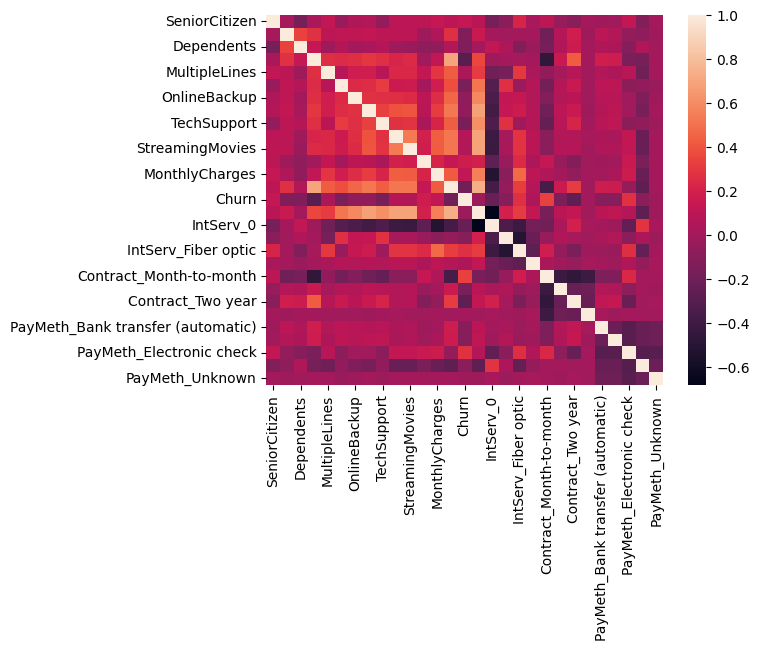

In [23]:
# Implementamos una matriz de correlación para observar aquellas variables de las que podríamos prescindir
Var_c_corr = numeric_columns.corr()
# observamos las dimensiones de esta matriz
print('Dimension de la matriz: ')
print(np.shape(Var_c_corr))
# visualizamos la matriz de correlacion
print('Matriz de Correlaciòn: ')
display(Var_c_corr)
# visualizamos el HeatMap de la matriz de correlacion para ayudarnos visualmente a definir màs rapido cuales se correlacionan y luego confirmarlo nuevamente en el cuadro
print('HeatMap de Matriz de Correlaciòn: ')
print(sns.heatmap(Var_c_corr))

Al observar la Matriz de Correlación procedemos a destacar aquellas relaciones que resultan significativas para el estudio. Es decir, tal vez existan valores de correlación altos que no serán mencionados ya que no aportan información relevante para el estudio, cuyo objetivo final es predecir que clientes tienden a cancelar sus servicios.


*   Tenure y Churn: Poseen correlación negativa de -0.3, esto nos indica que a mayor antiguedad del cliente, menor es la probabilidad de que abandonen el servicio => La fidelidad aumenta con el tiempo.
*   Churn y Contract: Como podemos observar, el tipo de contrato al que estan adheridos los clientes tambien es un factor importante. Por ejemplo, aquellos clientes que poseen contrato mes a mes tienen una correlación positiva con la cancelación de servicio de 0.33. Es decir, a menor plazo de contrato, mayores son las probabilidades de cancelar el servicio, y el riesgo. Ahora, aquellos clientes adheridos a contratos a 2 años tienen una correlación negativa de -0.26, lo mismo que los contratos a 1 año, sugiriendo entonces que la estabilidad contractual ayuda a retener clientes.
*   Churn y InternetService: Clientes con subscripción a internet Fibra Optica tienen una correlación positica de 0.27, lo que indica una mayor tendencia y probabilidad de abandonar los servicios en comparación con la subscripción DSL, con correlación negativa de -0.11, menos propensa a abandonar. Estos valores podrían sugerir una necesidad de mejorar los servicios de Fibra Optica, por insatisfacción de los clientes, o tambien que los servicios más baratos retienen mejor a los clientes.
*   Churn y MonthlyCharges: Ahora, si bien poseen una correlación positiva de 0.12, esta es baja. Con lo cual sugiere que, si bien cuanto más caro es el servicio, más propenso es el cliente a cancelar, el precio no es una de las variables más significativas a la hora de abandonar los servicios.




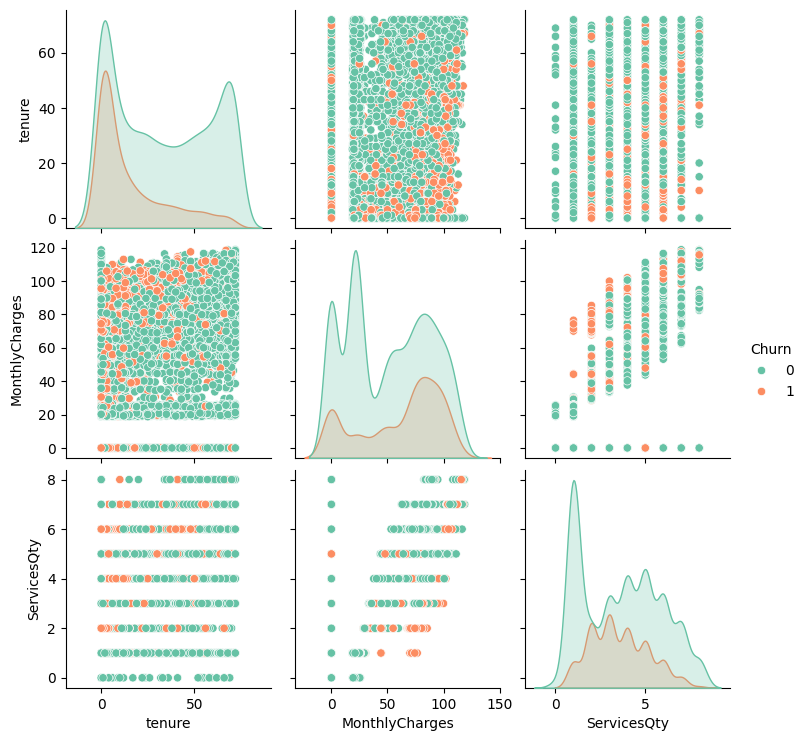

In [24]:
# Haremos un Pairplot para corroborar las relaciones detectadas:
selected_columns = ['tenure', 'MonthlyCharges', 'ServicesQty']
sns.pairplot(telcochurn_1, vars=selected_columns, hue='Churn', diag_kind='kde', palette='Set2')
plt.show()

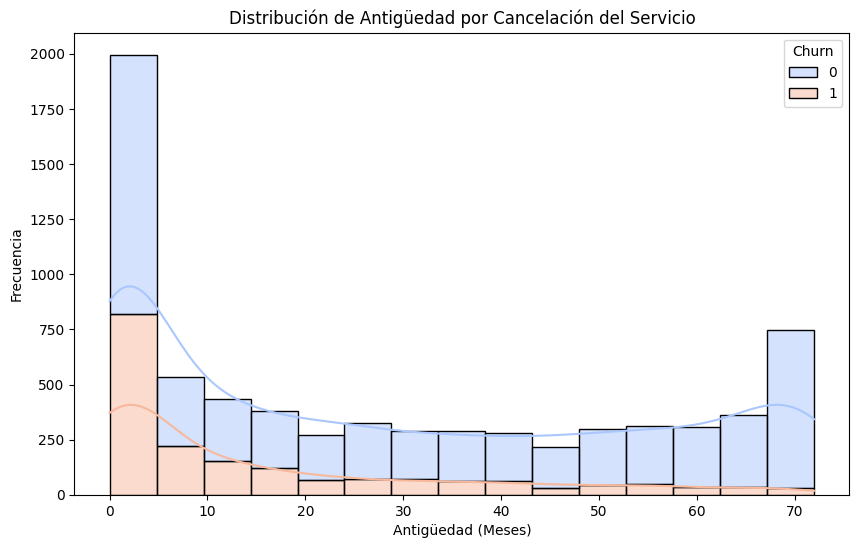

In [25]:
# Histograma combinado para visualizar la correlacion de Antiguedad (Tenure) y Abandono de Servicios (Churn)
plt.figure(figsize=(10, 6))
sns.histplot(data=telcochurn, x='tenure', hue='Churn', kde=True, palette='coolwarm', multiple='stack')
plt.title("Distribución de Antigüedad por Cancelación del Servicio")
plt.xlabel("Antigüedad (Meses)")
plt.ylabel("Frecuencia")
plt.show()

# **Machine Learning**

---



In [26]:
#Visualizo la matriz que toma solo las columnas numericas para tener una referencia de las features.
numeric_columns.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,IntServ_Unknown,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_Unknown,PayMeth_Bank transfer (automatic),PayMeth_Credit card (automatic),PayMeth_Electronic check,PayMeth_Mailed check,PayMeth_Unknown
0,0.0,1,0,1.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.0,0,0,34.0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,0.0,0,0,2.0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.0,0,0,0.0,0,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,0
4,0.0,0,0,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [27]:
# Definir 'y' como la columna objetivo 'Churn'
y = np.array(telcochurn[['Churn']])

# Seleccionar solo las columnas numéricas para 'x'
x = telcochurn_1.select_dtypes(include=[np.number]).drop(['Churn'], axis=1)

# Separar el dataset en conjuntos de entrenamiento y prueba
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=4)

# Verificar las columnas seleccionadas
print("Columnas seleccionadas para x:", x.columns)

Columnas seleccionadas para x: Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'ServicesQty', 'IntServ_0', 'IntServ_DSL',
       'IntServ_Fiber optic', 'IntServ_Unknown', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'Contract_Unknown',
       'PayMeth_Bank transfer (automatic)', 'PayMeth_Credit card (automatic)',
       'PayMeth_Electronic check', 'PayMeth_Mailed check', 'PayMeth_Unknown'],
      dtype='object')


In [28]:
# observamos como queda la matriz de xtrain
xtrain.shape

(5282, 28)

In [29]:
# observamos como queda la matriz de xtest
xtest.shape

(1761, 28)

### **Auto-Scaling**

Queremos dejar todas las features en los mismos rangos por eso utilizaremos el standard scaler para que queden con media 0 y desvio standard 1.

In [30]:
# Auto scaling train- set (mean = 0, std = 1)
# Creamos el standard scaler y lo "fiteamos" al mismo tiempo con "xtrain"
scaler = preprocessing.StandardScaler().fit(xtrain)
# xtrain_scal tendra el dataset de train pre-procesado con el standard scaler
xtrain_scal = scaler.transform(xtrain)

In [31]:
# Para cada feature imprimimos la media y el desvio standard obtenido. Ver que
# media = 0 y stdev = 1.
print("media de cada feature a lo largo del dataset")
print(xtrain_scal.mean(axis=0))
print(" ")
print("Desvio STD de cada feature a lo largo del dataset")
print(xtrain_scal.std(axis=0))

media de cada feature a lo largo del dataset
[ 4.30468905e-17  8.74389963e-17 -8.20581350e-17 -6.86059817e-17
  4.20379790e-17 -2.28686606e-17 -4.17016751e-17 -2.28686606e-17
 -5.71716514e-17  1.34521533e-18 -4.30468905e-17  8.20581350e-17
 -2.07835768e-16  5.24633978e-17 -1.23759810e-16 -3.36303832e-18
  3.96838521e-17 -1.61425839e-17 -3.76660292e-17 -2.69043065e-17
 -6.86059817e-17 -6.65881587e-17  6.05346897e-18 -7.93677043e-17
 -9.41650729e-18 -3.22851678e-17  1.74877993e-17  4.50647135e-17]
 
Desvio STD de cada feature a lo largo del dataset
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [ ]:
# observamos en que type quedo xtrain_xcal
type(xtrain_scal)

numpy.ndarray

In [32]:
# Aplicamos el scaler a los datos de test.
xtest_scal = scaler.transform(xtest)
# Obviamente la media y stdev de las features en test no seran 0 y 1 ya que el scaler se ajusto con train unicamente.
print(xtest_scal.mean(axis=0))
print("")
print(xtest_scal.std(axis=0))

[-0.02711745  0.00626261  0.02576141 -0.01027821 -0.01074488  0.03709006
  0.03388836 -0.03272808  0.01826904  0.01893995  0.0107334  -0.01171792
 -0.01749198  0.02864842  0.02096846 -0.03026832  0.02435329 -0.00443511
  0.01175863  0.00514702  0.00640981 -0.00056847 -0.01265024  0.03955296
 -0.0705996  -0.00557206  0.00136047  0.03803168]

[0.97156423 1.00027948 1.01157291 1.00655816 0.99698415 1.02061118
 1.01448992 0.98894342 1.00834395 1.00440852 1.00243898 1.00177124
 1.00645559 1.00892841 1.00314754 0.97883787 1.01056084 0.99890747
 1.01515506 1.00043858 1.00548779 0.99957112 0.98881213 1.03210529
 0.9376495  0.9973231  1.00108167 1.0328018 ]


Text(0.5, 1.0, 'Standarized test data')

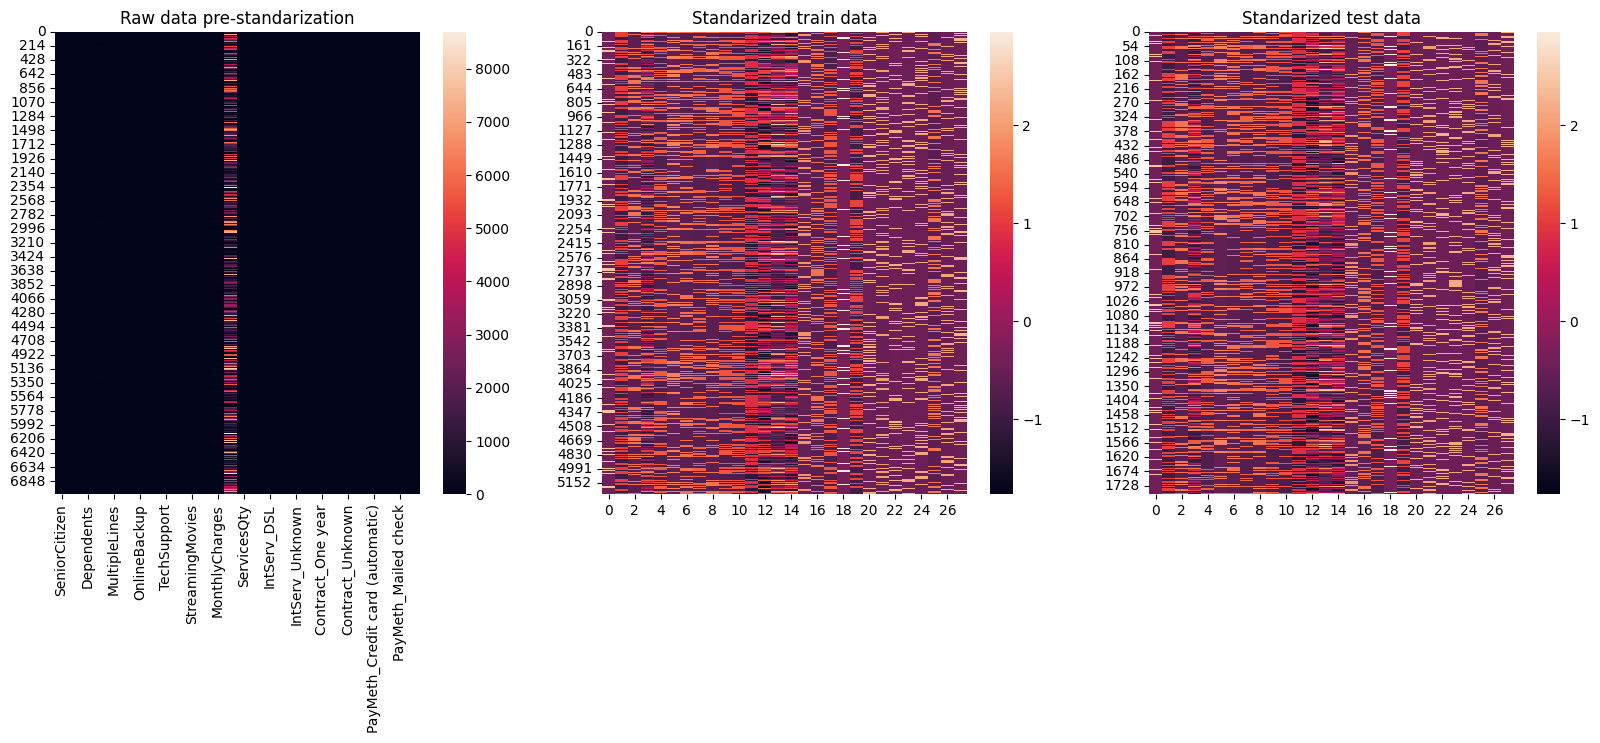

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
sns.heatmap(xtest_scal, ax = axs[2])
axs[0].set_title('Raw data pre-standarization')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')

## **GridSearchCV**

In [35]:
# Defino el modelo de Logistic Regression llamado modelo_lr
modelo_lr = LogisticRegression().fit(xtrain_scal, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print(f'Coef. de Determinación => {modelo_lr.score(xtest_scal, ytest)}')
print(f'Coef. de Regresión => {modelo_lr.coef_}')
print(f'Intersección => {modelo_lr.intercept_}')

Coef. de Determinación => 0.7791027825099376
Coef. de Regresión => [[ 0.06682008 -0.05807169 -0.05268601 -0.29894586  0.10791309 -0.18372177
  -0.08437562 -0.01100126 -0.17006336  0.20449103  0.21107837  0.18170394
  -0.07271974 -0.49145123 -0.08638752 -0.56046214 -0.06760506  0.4360222
   0.16812744  0.28460119 -0.10003676 -0.34882199  0.09398046 -0.01104812
  -0.07524746  0.12355005 -0.04937535 -0.00841505]]
Intersección => [-1.54997432]


In [37]:
# Definimos el grid de parámetros con saga (l1, l2 y elasticnet)
param_grid = [
    # Configuración para l1
    {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'], 'tol': [0.01], 'solver': ['saga']},
    # Configuración para l2
    {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'tol': [0.01], 'solver': ['saga']},
    # Configuración para elasticnet
    {'C': [0.01, 0.1, 1, 10], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9], 'tol': [0.01]}
]

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelo_lr, param_grid=param_grid, cv=5, verbose=1)

# Ajustar el modelo
grid_search.fit(xtrain_scal, ytrain.ravel())

# Mostrar los mejores parámetros y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.01}
Mejor puntuación: 0.7998853243886357


In [ ]:
# Volvemos a correrlo con los mejores hiperparametros seleccionados
# Definimos el grid de parámetros con saga (l1, l2 y elasticnet)
param_grid1 = [
    # Configuración para elasticnet
    {'C': [0.05, 0.1, 0.5], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.05, 0.1, 0.5], 'tol': [0.01]}
]

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelo_lr, param_grid=param_grid1, cv=5, verbose=1)

# Ajustar el modelo
grid_search.fit(xtrain_scal, ytrain.ravel())

# Mostrar los mejores parámetros y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores parámetros: {'C': 0.1, 'l1_ratio': 0.05, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.01}
Mejor puntuación: 0.7991272110891317


In [ ]:
# Toda la informacion del entrenamiento esta en cv_results_
scores = grid_search.cv_results_
# La observamos para reconocer los hiperparametros que mejor performaron
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065512,0.018749,0.002114,0.001148,0.05,0.05,elasticnet,saga,0.01,"{'C': 0.05, 'l1_ratio': 0.05, 'penalty': 'elas...",0.791864,0.813623,0.782197,0.810606,0.794508,0.798560,0.011841,4
1,0.089569,0.027586,0.004252,0.001429,0.05,0.10,elasticnet,saga,0.01,"{'C': 0.05, 'l1_ratio': 0.1, 'penalty': 'elast...",0.792810,0.815516,0.781250,0.810606,0.794508,0.798938,0.012498,2
2,0.091027,0.021585,0.006852,0.001480,0.05,0.50,elasticnet,saga,0.01,"{'C': 0.05, 'l1_ratio': 0.5, 'penalty': 'elast...",0.788079,0.818354,0.781250,0.807765,0.795455,0.798181,0.013379,6
3,0.093279,0.019977,0.005319,0.003633,0.10,0.05,elasticnet,saga,0.01,"{'C': 0.1, 'l1_ratio': 0.05, 'penalty': 'elast...",0.792810,0.815516,0.783144,0.810606,0.793561,0.799127,0.012056,1
4,0.097960,0.021357,0.003838,0.001806,0.10,0.10,elasticnet,saga,0.01,"{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'elasti...",0.793756,0.814570,0.782197,0.809659,0.793561,0.798748,0.011791,3


## **Predicciones del modelo**

In [ ]:
#Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = modelo_lr.predict(xtest_scal)

In [ ]:
# visualizamos en pantalla el resultado de las predicciones para cada muestra del conjunto de test
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy del ytest es " + str(test_acc))

El accuracy del ytest es 0.7819420783645656


In [ ]:
#Compute and plot AUC
yproba = modelo_lr.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc_score = auc(fpr1, tpr1)
print("El AUC es = " + str(auc_score))

El AUC es = 0.8113767181559568


El AUC se encuentra entre 0.5 < **0.81** < 1 es decir, no es perfecto, pero sabemos que clasifica significativamente mejor que uno aleatorio. Entonces, podemos decir que tiene un buen desempaño, aunque hay espacio de mejora.

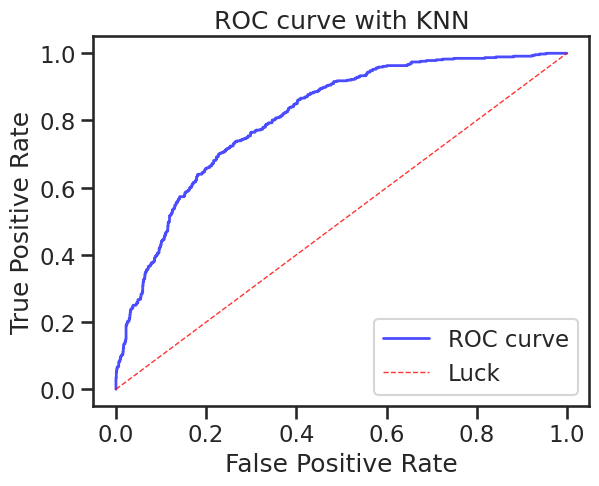

In [ ]:
#Imprimimos la curva AUC ROC
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

Nuevamente podemos confirmar con la curva ROC el buen desempeño del modelo. La curva se ecuentra más bien cerca de la esquina superior izquierda y dista significativamente de la recta aleatoria.

In [ ]:
# Compute confusion Matrix
cm = confusion_matrix(ytest, ypred)

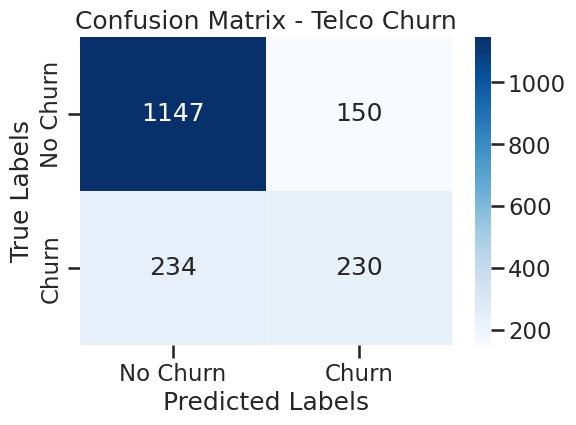

In [ ]:
# Creamos un DataFrame con etiquetas significativas
df_cm = pd.DataFrame(cm, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])

# Visualizamos la matriz de confusión como un heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Telco Churn')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## **Optimizaciones del modelo: PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Haremos un PCA con el 80% de los datos para entender si esta reducción de datos ayuda a mi modelo o no
pca = PCA(n_components=0.8)
ytest = ytest.ravel()
ytrain = ytrain.ravel()
X_train_pca = pca.fit_transform(xtrain_scal)
X_test_pca = pca.transform(xtest_scal)

# Entrenamos el modelo con PCA
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, ytrain)
y_pred_pca = clf_pca.predict(X_test_pca)
y_pred_prob_pca = clf_pca.predict_proba(X_test_pca)[:, 1]

print("--- Modelo con PCA (80% varianza) ---")
print(classification_report(ytest, y_pred_pca))
print(f"AUC-ROC: {roc_auc_score(ytest, y_pred_prob_pca):.4f}")

--- Modelo con PCA (80% varianza) ---
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1297
           1       0.55      0.42      0.48       464

    accuracy                           0.76      1761
   macro avg       0.68      0.65      0.66      1761
weighted avg       0.74      0.76      0.75      1761

AUC-ROC: 0.7743


In [ ]:
# Comparamos modelos para ver si realmente el PCA está mejorando o empeorando los resultados
# Modelo base (sin PCA)
model_base = RandomForestClassifier(random_state=42)
model_base.fit(xtrain, ytrain)
y_pred_base = model_base.predict(xtest)

# Modelo con PCA
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, ytrain)
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluación del modelo base
print("\n--- Modelo sin PCA ---")
print(classification_report(ytest, y_pred_base))
print("AUC-ROC:", roc_auc_score(ytest, model_base.predict_proba(xtest)[:, 1]))

# Evaluación del modelo con PCA
print("\n--- Modelo con PCA ---")
print(classification_report(ytest, y_pred_pca))
print("AUC-ROC:", roc_auc_score(ytest, model_pca.predict_proba(X_test_pca)[:, 1]))


--- Modelo sin PCA ---
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1297
           1       0.60      0.47      0.53       464

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761

AUC-ROC: 0.8032428947438385

--- Modelo con PCA ---
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1297
           1       0.55      0.42      0.48       464

    accuracy                           0.76      1761
   macro avg       0.68      0.65      0.66      1761
weighted avg       0.74      0.76      0.75      1761

AUC-ROC: 0.7743042631536969


Con el modelo **sin PCA** obtuvimos un **mejor rendimiento** general, logrando una exactitud del **78%** y un AUC-ROC de **0.80**. Ahora, con el modelo **con PCA**, que redujo la dimensionalidad de los datos, obtenemos un **menor desempeño**, alcanzando una exactitud del** 75%** y un AUC-ROC de **0.78**. Esto nos indica que la reducción de dimensiones mediante PCA no está siendo más eficiente, por el contrario puede haber perdido información relevante para la clasificación y por eso se redujo el rendimiento.

Las dos características más importantes son: [13  3]
Nombres de las dos características más importantes: Index(['TotalCharges', 'tenure'], dtype='object')


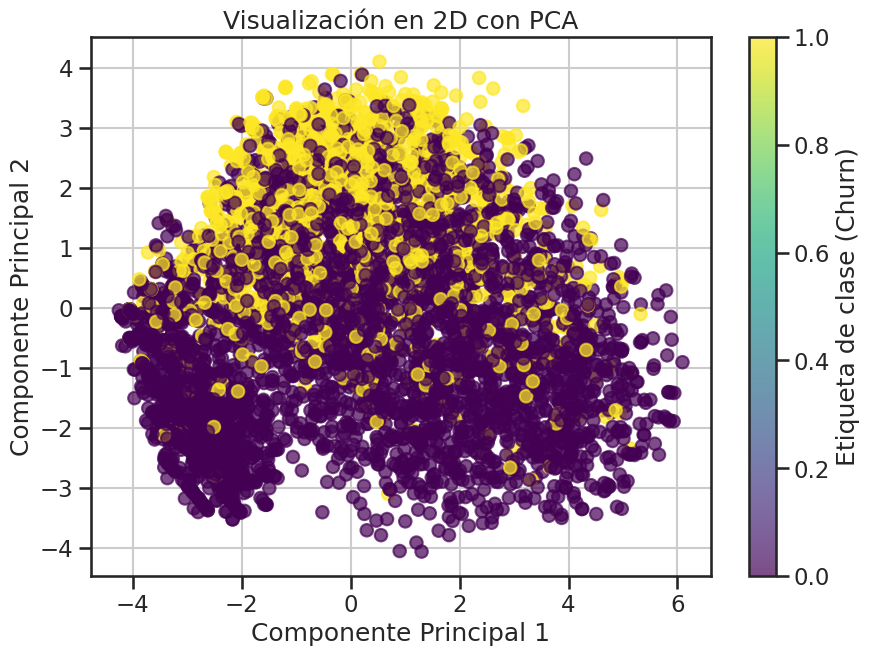

In [ ]:
# Aún cuando el PCA no nos resulto útil para mejorar los resutados, si servira para visualizar en 2D nuestro Dataset y entender donde se ubican los clientes
# El PCA tomará los 2 componentes más importantes (que representan mayor % de varainza) para correr el análisis, de todos modos primero visualizaremos cuales son esas más importantes

# Obtenemos la importancia de las características
clf_base = RandomForestClassifier(random_state=42)
clf_base.fit(xtrain_scal, ytrain)

importances = clf_base.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostramos las dos características más importantes
top_features = indices[:2]
print("Las dos características más importantes son:", top_features)

# Extraemos los nombres de características
feature_names = xtrain.columns
print("Nombres de las dos características más importantes:", feature_names[top_features])

# PCA con 2 componentes
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_pca)  # Usamos los datos ya reducidos del PCA anterior
X_test_pca_2d = pca_2d.transform(X_test_pca)

# Visualizamos en 2D del dataset
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=ytrain, cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Etiqueta de clase (Churn)")
plt.title("Visualización en 2D con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()

En el gráfico, se muestran las dos direcciones principales de los datos: Componente Principal 1 (CP1) y Componente Principal 2 (CP2) Estas componentes no corresponden a una característica específica del dataset, sino que son combinaciones lineales de todas las características originales, con un mayor peso en aquellas más importantes (como TotalCharges y MonthlyCharges, según el análisis de importancia)

La distribución de los puntos en un espacio bidimensional muestra cómo se organizan los clientes según las características originales, pero proyectadas en nuevas dimensiones. Este gráfico nos permite ver patrones generales y cómo se ubican los clientes en términos de variabilidad general.

Este análisis permite visualizar el dataset en 2D, destacando las direcciones de mayor variabilidad, lo que podría ser útil para identificar patrones o clusters en los clientes relacionados con el churn. De todas formas con estas dos dimensiones seleccionadas no está claro en el gráfico cual sería la separación. Tal vez lo mejor sería tomar diferentes parametros.


---


### **Conclusiones**


---



Esta investigación se centró en desarrollar un modelo que utiliza técnicas de aprendizaje automático para predecir la pérdida de clientes de las empresas de telecomunicaciones. El proceso comenzó con el análisis exploratorio de  datos (EDA), donde se analizaron las variables del dataset, identificando las más relevantes para predecir si un cliente abandonará la empresa o no.

A continuación, procesamos los datos, normalizando las variables numéricas y transformando las variables categóricas para que el modelo pudiera trabajar correctamente con todos los tipos de datos y aprenderlos.

Ademas, entrenamos el modelo de Machine Learning, con Regresión Logística. Este mostró un buen rendimiento, demostrando que el modelo tiene una buena capacidad para distinguir entre clientes que se quedarán y los que se irán. Y para mejorar la capacidad del modelo, utilizamos la técnica de optimización de hiperparámetros GridSearchCV, lo que nos permitió encontrar los mejores parámetros para obtener un modelo más preciso.

Para evaluar el desempeño del modelo, utilizamos diferentes métricas como la matriz de confusión y la curva ROC. La matriz de confusión mostró que el modelo tiene una tasa de aciertos decente, aunque algunas predicciones caen erroneamente en la clase de clientes que no se van (No Churn). Las curvas ROC y AUC ayudaron a visualizar cómo el modelo clasifica a los clientes y proporcionaron una manera de ver si el modelo tiene un buen equilibrio entre los aciertos y los errores.

Para continuar testeando el modelo y en busca del mejor resultado posible, aplicamos la técnica de reducción de dimensionalidad con PCA (Principal Component Analysis). Sin embargo, este paso no mejoró significativamente el rendimiento del modelo, ya que el dataset ya estaba bien optimizado.

En resumen, este trabajo demostró cómo Machine Learning puede ser utilizado para predecir el abandono de clientes en Telco. Aunque el modelo construido es bastante preciso, siempre se pueden realizar mejoras adicionales, tal vez por ejemplo probando con otro método de machine learning. Este tipo de modelo puede ser muy útil para la empresa, porque les permitirá identificar a los clientes con mayor riesgo de irse, dandoles la oportunidad de actuar antes de que suceda. Buscar cuales son los factores que inciden más en su cancelación de servicios, o aquellos servicios que requieren mejoras, como por ejemplo notamos que aquellos clientes que poseen Fibra Optica son los que más tienden a cancelar.